# CS 6220 Final Project: Predicting Firms' Financial Risk
## Data Cleaning, EDA, and Baseline Model
**Group Members:** Jiajun Fang, Yini Li

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Load Parquet Files

In [2]:
# Step 1: Import required libraries
import pandas as pd
import os

In [3]:
# Step 2: Check if the Parquet files exist in the current directory
train_file = "20231124_Financial_Risk_Project_train (1).parquet"
test_file = "20231124_Financial_Risk_Project_test_public (1).parquet"

print("Train file exists:", os.path.exists(train_file))
print("Test file exists:", os.path.exists(test_file))

Train file exists: True
Test file exists: True


In [8]:
# Step 3: Load the parquet files
train_df = pd.read_parquet(train_file)
test_df = pd.read_parquet(test_file)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()

Train shape: (415, 73)
Test shape: (104, 71)


,url,call_transcript,VWAP,exchangeCountry,securityType,CIK,name,securityID,incorporationCountry,exchangeName,...,Working Capital,businessDescription,close,dividendFactor,fiscalDint,floatShares,outstandingShares,shortInterestFloat,FinancialSector,FinancialRisk
ticker,,,,,,,,,,,,,,,,,,,,,
FICO,https://seekingalpha.com/article/4649507-fair-...,Fair Isaac Corporation (FICO) Q4 2023 Earnings...,700.83,USA,Common or ordinary,0000814547,Fair Isaac Corporation,138240101,USA,New York Stock Exchange,...,5.063632,"Fair Isaac Corporation develops analytic, soft...",598.58,1.000000,20221231,24272216.0,25154000.0,0.033322,0,0.0
RXRX,https://seekingalpha.com/earnings/earnings-cal...,Earnings Call Transcripts | Seeking Alpha\n\n\...,6.67,USA,Common or ordinary,0001601830,Recursion Pharmaceauticals Inc,384740101,USA,Nasdaq Stock Market,...,2.528944,"Recursion Pharmaceuticals, Inc. operates as a ...",7.71,1.000000,20221231,117933131.0,174072906.0,0.130693,0,0.0
BLDR,https://seekingalpha.com/article/4645938-build...,"Builders FirstSource, Inc. (BLDR) Q3 2023 Earn...",88.34,USA,Common or ordinary,0001316835,Builders FirstSource Inc,1630360101,USA,New York Stock Exchange,...,11.272943,"Builders FirstSource, Inc., together with its ...",64.88,1.000000,20221231,146461116.0,148994000.0,0.040739,0,0.0
JKHY,https://seekingalpha.com/article/4649242-jack-...,"Jack Henry & Associates, Inc. (JKHY) Q1 2024 E...",150.47,USA,Common or ordinary,0000779152,Henry (Jack) & Associates Inc,118110101,USA,Nasdaq Stock Market,...,0.843418,"Jack Henry & Associates, Inc., a financial tec...",175.56,0.989936,20221231,72430647.0,72910225.0,0.030052,0,0.0
OC,https://seekingalpha.com/article/4643409-owens...,Owens Corning (OC) Q3 2023 Earnings Call Trans...,95.47,USA,Common or ordinary,0001370946,Owens Corning,82140601,USA,New York Stock Exchange,...,15.414013,Owens Corning engages in manufacture and sale ...,85.30,0.980838,20221231,94098317.0,94700000.0,0.038574,0,0.0


In [ ]:
# Use the already loaded parquet data
df = train_df.copy()
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (415, 73)


,url,call_transcript,VWAP,exchangeCountry,securityType,CIK,name,securityID,incorporationCountry,exchangeName,...,Working Capital,businessDescription,close,dividendFactor,fiscalDint,floatShares,outstandingShares,shortInterestFloat,FinancialSector,FinancialRisk
ticker,,,,,,,,,,,,,,,,,,,,,
FICO,https://seekingalpha.com/article/4649507-fair-...,Fair Isaac Corporation (FICO) Q4 2023 Earnings...,700.83,USA,Common or ordinary,0000814547,Fair Isaac Corporation,138240101,USA,New York Stock Exchange,...,5.063632,"Fair Isaac Corporation develops analytic, soft...",598.58,1.000000,20221231,24272216.0,25154000.0,0.033322,0,0.0
RXRX,https://seekingalpha.com/earnings/earnings-cal...,Earnings Call Transcripts | Seeking Alpha\n\n\...,6.67,USA,Common or ordinary,0001601830,Recursion Pharmaceauticals Inc,384740101,USA,Nasdaq Stock Market,...,2.528944,"Recursion Pharmaceuticals, Inc. operates as a ...",7.71,1.000000,20221231,117933131.0,174072906.0,0.130693,0,0.0
BLDR,https://seekingalpha.com/article/4645938-build...,"Builders FirstSource, Inc. (BLDR) Q3 2023 Earn...",88.34,USA,Common or ordinary,0001316835,Builders FirstSource Inc,1630360101,USA,New York Stock Exchange,...,11.272943,"Builders FirstSource, Inc., together with its ...",64.88,1.000000,20221231,146461116.0,148994000.0,0.040739,0,0.0
JKHY,https://seekingalpha.com/article/4649242-jack-...,"Jack Henry & Associates, Inc. (JKHY) Q1 2024 E...",150.47,USA,Common or ordinary,0000779152,Henry (Jack) & Associates Inc,118110101,USA,Nasdaq Stock Market,...,0.843418,"Jack Henry & Associates, Inc., a financial tec...",175.56,0.989936,20221231,72430647.0,72910225.0,0.030052,0,0.0
OC,https://seekingalpha.com/article/4643409-owens...,Owens Corning (OC) Q3 2023 Earnings Call Trans...,95.47,USA,Common or ordinary,0001370946,Owens Corning,82140601,USA,New York Stock Exchange,...,15.414013,Owens Corning engages in manufacture and sale ...,85.30,0.980838,20221231,94098317.0,94700000.0,0.038574,0,0.0


## Data Cleaning

In [9]:
# Drop irrelevant features
irrelevant_cols = ['url', 'exchangeCountry', 'CIK', 'securityID', 
                   'incorporationCountry', 'exchangeName', 'exchangeID', 'businessDescription']
df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

# Drop columns with more than 20% missing values
missing_threshold = 0.2
df.dropna(axis=1, thresh=(1 - missing_threshold) * len(df), inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

## Exploratory Data Analysis (EDA)

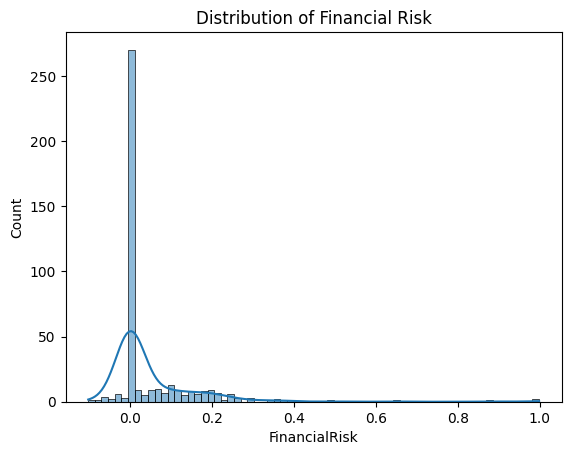

In [10]:
# Check distribution of target
sns.histplot(df['FinancialRisk'], kde=True)
plt.title('Distribution of Financial Risk')
plt.show()

# Log-transform target
df['FinancialRisk_log'] = np.log1p(df['FinancialRisk'])

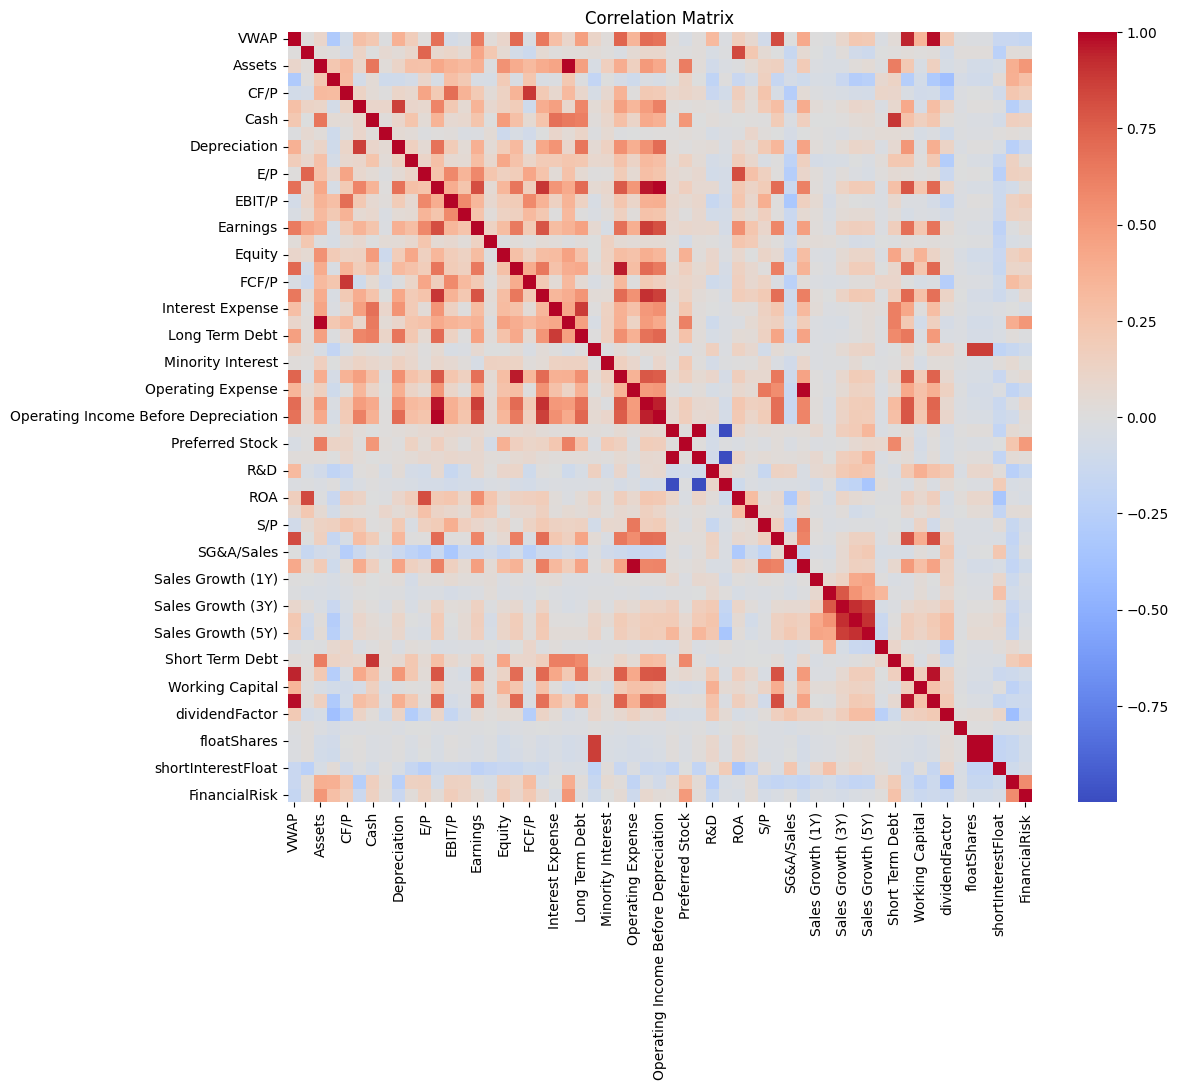

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Baseline Model: Linear Regression

In [ ]:
# Baseline Model: Linear Regression
selected_features = ['Assets', 'Cash', 'Debt/Equity', 'B/P', 'SG&A/Sales', 'Long Liabilities']
print('Columns in DataFrame:', df.columns.tolist())
missing_features = [col for col in selected_features if col not in df.columns]
if missing_features:
    print('The following features are missing from the data:', missing_features)
else:
    print('All selected features are present in the data.')
if 'FinancialRisk_log' not in df.columns:
    print('FinancialRisk_log column is missing. Please make sure the previous cell has been executed.')
else:
    print('FinancialRisk_log column exists.')
print('Missing value count for selected features:')
print(df[selected_features].isnull().sum())
# Convert selected features to numeric type
for col in selected_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Remove all rows with missing values in selected features or target
df_clean = df.dropna(subset=selected_features + ['FinancialRisk_log']).copy()
print('Shape after dropping missing:', df_clean.shape)
# Continue with modeling
X = df_clean[selected_features]
y = df_clean['FinancialRisk_log']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns)
    ])
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f'R² Score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

SyntaxError: invalid syntax (3315381358.py, line 46)